# 2) <center> Entendimiento de los Datos <center>

## 2.1) Introducción 

En esta fase se descubrirán las variables/campos y las tuplas encontradas en la base de datos proporcionada. Exploraremos las posibles características más importantes y descubriremos la calidad de los datos proporcionados.

## 2.2) Descripción de los Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

Cargamos la base de datos con pandas

In [2]:
data=pd.read_csv('wkcomp_pos.csv')
display(data)

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,44300,Tower Ins Co Of NY,1997,2002,6,334,287,15,4387,3374,1013,1,1187
13196,44300,Tower Ins Co Of NY,1997,2003,7,318,293,2,4387,3374,1013,1,1187
13197,44300,Tower Ins Co Of NY,1997,2004,8,323,300,7,4387,3374,1013,1,1187
13198,44300,Tower Ins Co Of NY,1997,2005,9,310,297,0,4387,3374,1013,1,1187


La base de datos contiene:

In [3]:
print(f"{data.shape[0]} filas/tuplas")
print(f"{data.shape[1]} columnas/campos")

13200 filas/tuplas
13 columnas/campos


La siguiente tabla contiene información sobre el tipo de elementos encontrado en los campos y la cantidad de datos:

In [4]:
# Customización de data.info()
d={'Column':data.columns.values,'Non-Null':data.notnull().count().values,
   'Count':data.count().values,'Dtypes':data.dtypes.values}
pd.DataFrame(d)

,Column,Non-Null,Count,Dtypes
0,GRCODE,13200,13200,int64
1,GRNAME,13200,13200,object
2,AccidentYear,13200,13200,int64
3,DevelopmentYear,13200,13200,int64
4,DevelopmentLag,13200,13200,int64
5,IncurLoss_D,13200,13200,int64
6,CumPaidLoss_D,13200,13200,int64
7,BulkLoss_D,13200,13200,int64
8,EarnedPremDIR_D,13200,13200,int64
9,EarnedPremCeded_D,13200,13200,int64


Esta tabla proporciona información sobre un conjunto de datos con 13 columnas. Cada columna contiene 13,200 entradas no nulas. Las columnas representan varios tipos de datos, incluidos enteros (int64) y objetos. Las columnas parecen contener información relacionada con datos de seguros o financieros, como el año del accidente, el año de desarrollo y diversas métricas financieras como pérdidas incurridas, pérdidas acumuladas, primas devengadas y reservas.

## 2.2) Calidad de los Datos

 Al no haber datos no nulos, en principio, no es necesario descartar ninguna fila. Los campos GRCODE y GRNAME vienen siendo identificadores de cliente que para un histograma no vienen siendo relevantes, por el contrario, para buscar valores excepcionales o anomalías. El campo PostedReserve97_D no tiene un significado claro por el momento.
 
Exploremos algunas estadísticas descriptivas, en particular el rango de valores (min,max) de los datos:

In [5]:
pd.DataFrame(data.describe(exclude=object)).round(decimals=2)

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
count,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00
mean,17153.05,1992.50,1997.00,5.50,11532.05,8215.74,1570.13,18438.47,1812.34,16626.13,0.73,39714.40
std,12512.21,2.87,4.06,2.87,35595.56,25714.08,7259.02,51830.70,6666.66,48941.72,0.45,130130.68
min,86.00,1988.00,1988.00,1.00,-59.00,-338.00,-4621.00,-6518.00,-3522.00,-9731.00,0.00,0.00
25%,8526.00,1990.00,1994.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,411.00
50%,14110.00,1992.50,1997.00,5.50,544.00,351.50,5.00,1419.00,144.50,827.00,1.00,2732.00
75%,26983.25,1995.00,2000.00,8.00,6526.50,4565.00,259.25,11354.25,1141.00,9180.50,1.00,19265.75
max,44300.00,1997.00,2006.00,10.00,367404.00,325322.00,145296.00,421223.00,78730.00,418755.00,1.00,1090093.00


Se observa que el valor mínimo para GRCODE es de 86 y el máximo de 44300. Como el total de datos es de 13200, esto quiere decir que hay unos valores de GRCODE que no se encuentran la tabla.Por otro lado vemos los órdenes de magnitud de ciertas cantidades, por ejemplo, AccidentYear y DevelopmentYear que están en años (1988 a 1997) y (1988 a 2006), DevelopmentLag que es un número entre 1 y 10 (años?). IncurLoss_D, CumPaidLoss_D, BulkLoss_D,EarnedPremDIR_D, EarnedPremCeded_D, EarnedPremNet_D y PostedReserve97_D que pueden ser positivos o negativos y parecen estar en dólares (sorprende que algunos llegan a los cientos de miles de dólares). 7

Finalmente Single, que es una variable binaria que toma los valores 0 y 1.

# 2.3) Exploración  de los Datos

Realizamos las gráficas entre las variables numéricas para ver si hay alguna correlación entre ellas

In [25]:
# data.columns[12]
for i, field1 in enumerate(data.columns):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


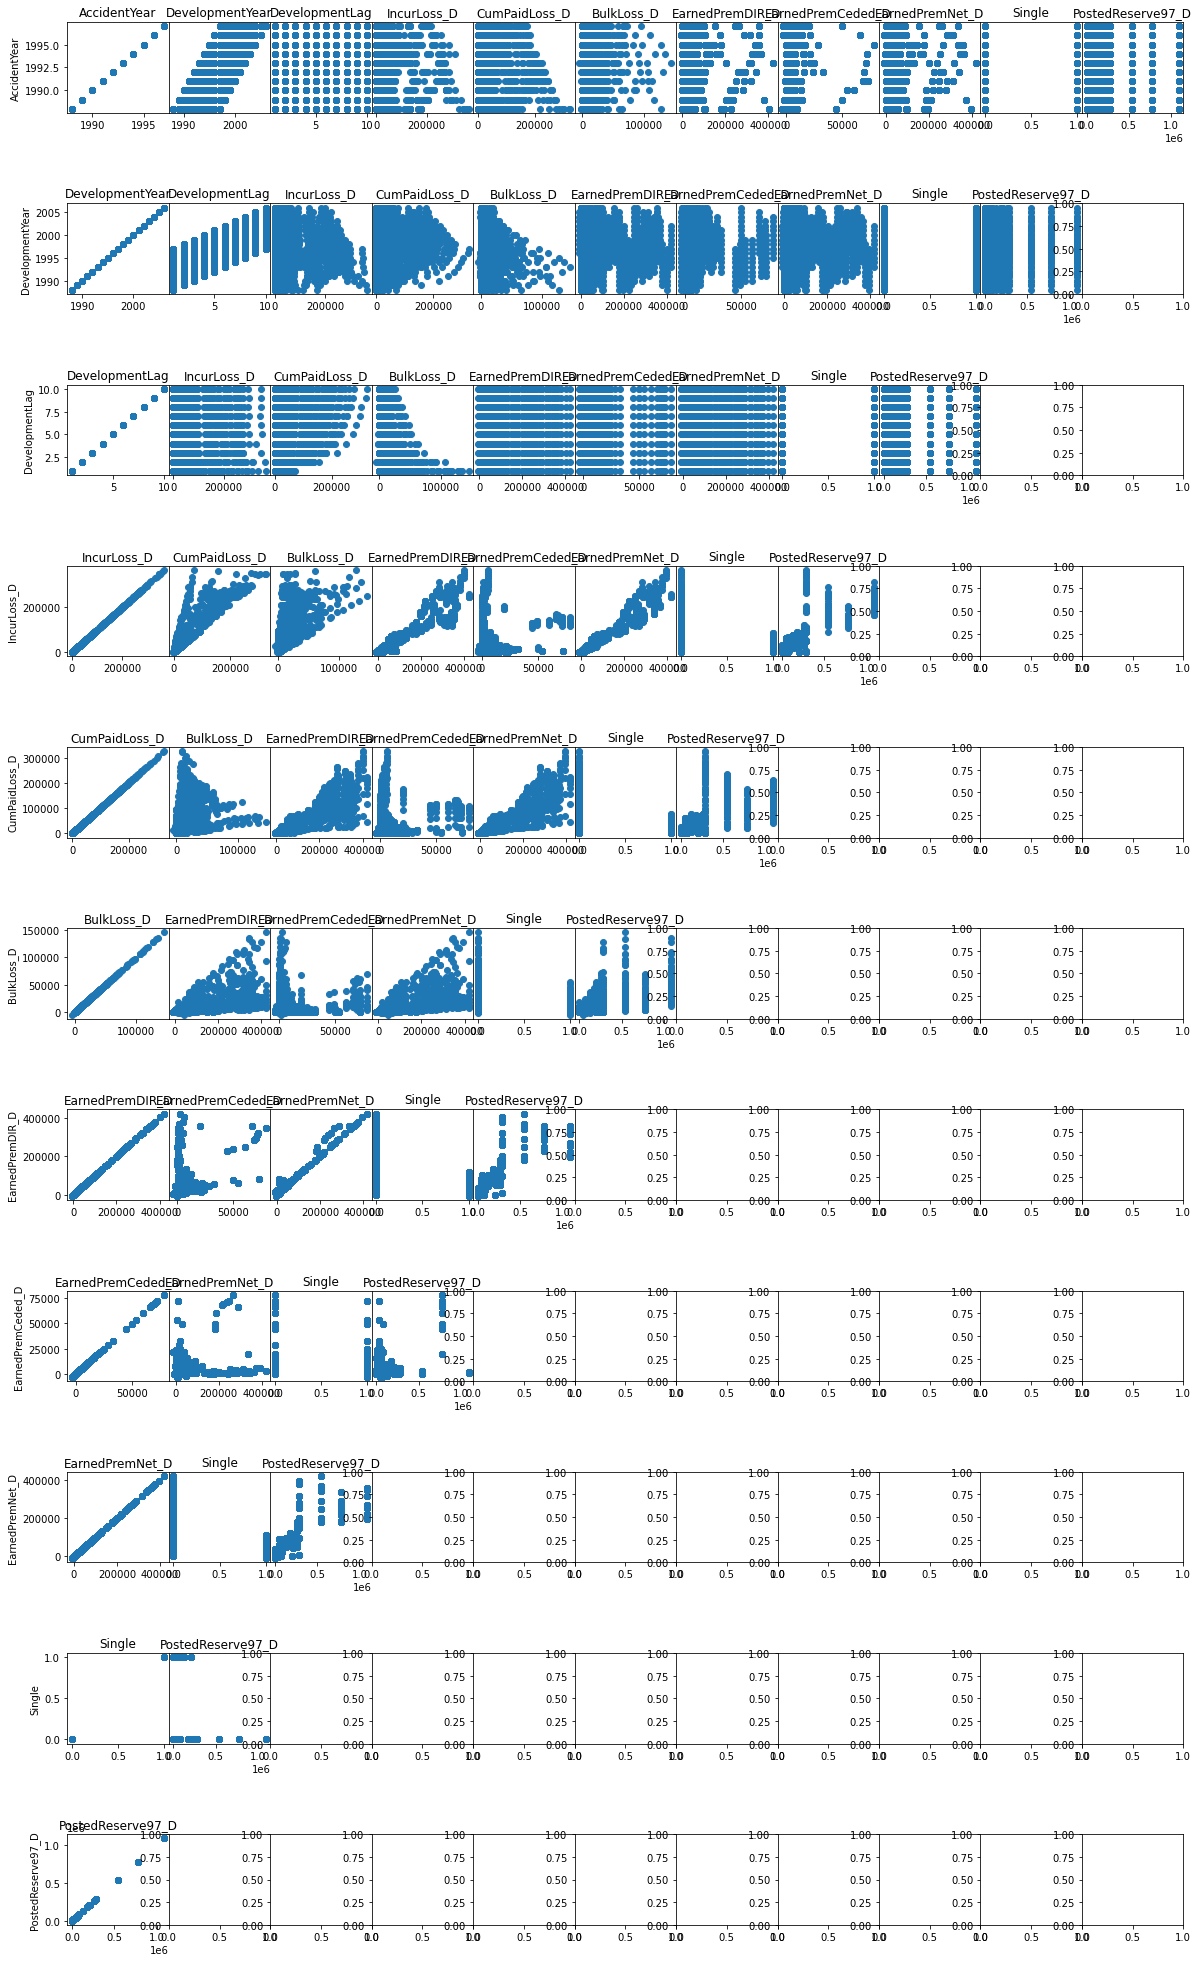

In [51]:
fig, axs = plt.subplots(11, 11,figsize=(20, 35))
# Plot something in each subplot
for i, field1 in enumerate(data.columns):
    if(i>=2):
        axs[i-2][0].set_ylabel(field1)
        for j, field2 in enumerate(data.columns[i:]):
            axs[i-2][j].scatter(data[field2],data[field1])
            if (j>=1):
                axs[i-2][j].set(yticks=[])
            axs[i-2][j].set_title(f'{field2}')
plt.subplots_adjust(wspace=0, hspace=1)
plt.show()


Guardamos los datos en archivos csv. Por eficiencia en tiempo convertimos la matriz 3D a 2D y guardamos los datos mediante numpy

In [ ]:
np.savetxt("shape_train.csv",x_train.shape, fmt="%.0f")
np.savetxt("shape_test.csv",x_test.shape, fmt="%.0f")
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
np.savetxt("x_train.csv",x_train, fmt="%.0f",delimiter=',')
np.savetxt("x_test.csv",x_test, fmt="%.0f",delimiter=',')
np.savetxt("y_train.csv",y_train, fmt="%.0f",delimiter=',')
np.savetxt("y_test.csv",y_test, fmt="%.0f",delimiter=',')